# Q2. Word Embedding

In [ ]:
import nltk
nltk.download('reuters')
from nltk.corpus import reuters

[nltk_data] Downloading package reuters to /root/nltk_data...


In [ ]:
!unzip /root/nltk_data/corpora/reuters.zip -d /root/nltk_data/corpora

Streaming output truncated to the last 5000 lines.
  inflating: /root/nltk_data/corpora/reuters/training/2231  
  inflating: /root/nltk_data/corpora/reuters/training/2232  
  inflating: /root/nltk_data/corpora/reuters/training/2234  
  inflating: /root/nltk_data/corpora/reuters/training/2236  
  inflating: /root/nltk_data/corpora/reuters/training/2237  
  inflating: /root/nltk_data/corpora/reuters/training/2238  
  inflating: /root/nltk_data/corpora/reuters/training/2239  
  inflating: /root/nltk_data/corpora/reuters/training/2240  
  inflating: /root/nltk_data/corpora/reuters/training/2244  
  inflating: /root/nltk_data/corpora/reuters/training/2246  
  inflating: /root/nltk_data/corpora/reuters/training/2247  
  inflating: /root/nltk_data/corpora/reuters/training/2249  
  inflating: /root/nltk_data/corpora/reuters/training/225  
  inflating: /root/nltk_data/corpora/reuters/training/2251  
  inflating: /root/nltk_data/corpora/reuters/training/2252  
  inflating: /root/nltk_data/corpor

In [ ]:
counter = 0
dataset = []

for field in reuters.fileids(categories=["crude"]):
  if counter < 100:
    dataset.append(field)
    counter = counter + 1

print(dataset)

['test/14829', 'test/15063', 'test/15200', 'test/15230', 'test/15238', 'test/15244', 'test/15322', 'test/15339', 'test/15344', 'test/15351', 'test/15520', 'test/15939', 'test/15964', 'test/16005', 'test/16007', 'test/16040', 'test/16077', 'test/16366', 'test/16429', 'test/16438', 'test/16593', 'test/16607', 'test/16636', 'test/16649', 'test/16651', 'test/16658', 'test/16710', 'test/16723', 'test/16739', 'test/16762', 'test/17054', 'test/17478', 'test/17516', 'test/17519', 'test/17584', 'test/17618', 'test/17658', 'test/17669', 'test/17750', 'test/17757', 'test/17771', 'test/17780', 'test/17813', 'test/17816', 'test/17875', 'test/17886', 'test/17888', 'test/17892', 'test/17913', 'test/17929', 'test/17963', 'test/18066', 'test/18085', 'test/18108', 'test/18146', 'test/18186', 'test/18213', 'test/18234', 'test/18311', 'test/18325', 'test/18329', 'test/18332', 'test/18340', 'test/18493', 'test/18521', 'test/18523', 'test/18621', 'test/18651', 'test/18655', 'test/18678', 'test/18680', 'test

In [ ]:
sentences = [" ".join(reuters.words(fid)) for fid in dataset] 
for temp in sentences:
  print(temp)

JAPAN TO REVISE LONG - TERM ENERGY DEMAND DOWNWARDS The Ministry of International Trade and Industry ( MITI ) will revise its long - term energy supply / demand outlook by August to meet a forecast downtrend in Japanese energy demand , ministry officials said . MITI is expected to lower the projection for primary energy supplies in the year 2000 to 550 mln kilolitres ( kl ) from 600 mln , they said . The decision follows the emergence of structural changes in Japanese industry following the rise in the value of the yen and a decline in domestic electric power demand . MITI is planning to work out a revised energy supply / demand outlook through deliberations of committee meetings of the Agency of Natural Resources and Energy , the officials said . They said MITI will also review the breakdown of energy supply sources , including oil , nuclear , coal and natural gas . Nuclear energy provided the bulk of Japan ' s electric power in the fiscal year ended March 31 , supplying an estimated 

In [ ]:
import re
import numpy as np

def create_unique_word_dict(text:list) -> dict:
    """
    A method that creates a dictionary where the keys are unique words
    and key values are indices
    """
    # Getting all the unique words from our text and sorting them alphabetically
    words = list(set(text))
    words.sort()

    # Creating the dictionary for the unique words
    unique_word_dict = {}
    for i, word in enumerate(words):
        unique_word_dict.update({
            word: i
        })

    return unique_word_dict    

def text_preprocessing(
    text:list,
    punctuations = r'''!()-[]{};:'"\,<>./?@#$%^&*_“~''',
    stop_words=['and', 'a', 'is', 'the', 'in', 'be', 'will']
    )->list:
    """
    A method to preproces text
    """
    for x in text.lower(): 
        if x in punctuations: 
            text = text.replace(x, "")

    # Removing words that have numbers in them
    text = re.sub(r'\w*\d\w*', '', text)

    # Removing digits
    text = re.sub(r'[0-9]+', '', text)

    # Cleaning the whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    # Setting every word to lower
    text = text.lower()

    # Converting all our text to a list 
    text = text.split(' ')

    # Droping empty strings
    text = [x for x in text if x!='']

    # Droping stop words
    text = [x for x in text if x not in stop_words]

    return text

# Functions to find the most similar word 
def euclidean(vec1:np.array, vec2:np.array) -> float:
    """
    A function to calculate the euclidean distance between two vectors
    """
    return np.sqrt(np.sum((vec1 - vec2)**2))

def find_similar(word:str, embedding_dict:dict, top_n=10)->list:
    """
    A method to find the most similar word based on the learnt embeddings
    """
    dist_dict = {}
    word_vector = embedding_dict.get(word, [])
    if len(word_vector) > 0:
        for key, value in embedding_dict.items():
            if key!=word:
                dist = euclidean(word_vector, value)
                dist_dict.update({
                    key: dist
                })

        return sorted(dist_dict.items(), key=lambda x: x[1])[0:top_n] 

In [ ]:
!pip install -r "/content/drive/MyDrive/requirements.txt"


0it [00:00, ?it/s]
4835it [00:00, 48349.59it/s]
9250it [00:00, 47007.73it/s]
13817it [00:00, 46596.47it/s]
18685it [00:00, 47200.83it/s]
23363it [00:00, 47073.26it/s]
28112it [00:00, 47197.46it/s]
32873it [00:00, 47319.88it/s]
37775it [00:00, 47816.35it/s]
42725it [00:00, 48309.24it/s]
47501it [00:01, 48142.36it/s]
52920it [00:01, 47271.31it/s]


Epoch 1/1000
52920/52920 [==============================] - 5s 90us/step - loss: 7.8509
Epoch 2/1000
52920/52920 [==============================] - 5s 88us/step - loss: 7.4822
Epoch 3/1000
52920/52920 [==============================] - 5s 88us/step - loss: 7.0654
Epoch 4/1000
52920/52920 [==============================] - 5s 87us/step - loss: 6.8378
Epoch 5/1000
52920/52920 [==============================] - 5s 89us/step - loss: 6.7742
Epoch 6/1000
52920/52920 [==============================] - 5s 87us/step - loss: 6.7571
Epoch 7/1000
52920/52920 [==============================] - 5s 91us/step - loss: 6.7486
Epoch 8/1000
52920/52920 [==============================] - 5s 92us/step - loss: 6.7429
Epoch 9/1000
52920/52920 [==============================] - 5s 102us/step - loss: 6.7387
Epoch 10/1000
52920/52920 [==============================] - 6s 113us/step - loss: 6.7354
Epoch 11/1000
52920/52920 [==============================] - 5s 91us/step - loss: 6.7327
Epoch 12/1000
52920/52920 [=

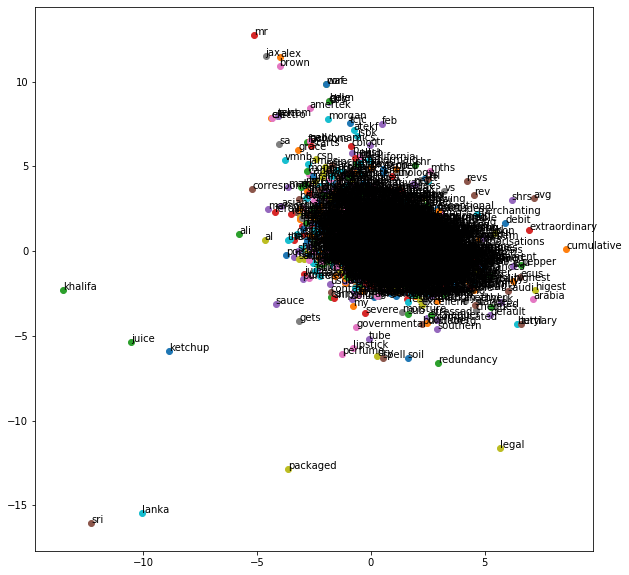

In [ ]:
import itertools
import pandas as pd
import numpy as np
import re
import os
from tqdm import tqdm

# Drawing the embeddings
import matplotlib.pyplot as plt

# Deep learning: 
from keras.models import Input, Model
from keras.layers import Dense

from scipy import sparse


# Defining the window for context
window = 2

# Creating a placeholder for the scanning of the word list
word_lists = []
all_text = []

for text in sentences:

    # Cleaning the text
    text = text_preprocessing(text)

    # Appending to the all text list
    all_text += text 

    # Creating a context dictionary
    for i, word in enumerate(text):
        for w in range(window):
            # Getting the context that is ahead by *window* words
            if i + 1 + w < len(text): 
                word_lists.append([word] + [text[(i + 1 + w)]])
            # Getting the context that is behind by *window* words    
            if i - w - 1 >= 0:
                word_lists.append([word] + [text[(i - w - 1)]])

unique_word_dict = create_unique_word_dict(all_text)

# Defining the number of features (unique words)
n_words = len(unique_word_dict)

# Getting all the unique words 
words = list(unique_word_dict.keys())

# Creating the X and Y matrices using one hot encoding
X = []
Y = []

for i, word_list in tqdm(enumerate(word_lists)):
    # Getting the indices
    main_word_index = unique_word_dict.get(word_list[0])
    context_word_index = unique_word_dict.get(word_list[1])

    # Creating the placeholders   
    X_row = np.zeros(n_words)
    Y_row = np.zeros(n_words)

    # One hot encoding the main word
    X_row[main_word_index] = 1

    # One hot encoding the Y matrix words 
    Y_row[context_word_index] = 1

    # Appending to the main matrices
    X.append(X_row)
    Y.append(Y_row)

# Converting the matrices into a sparse format because the vast majority of the data are 0s
X = sparse.csr_matrix(X)
Y = sparse.csr_matrix(Y)

# Defining the size of the embedding
embed_size = 2

# Defining the neural network
inp = Input(shape=(X.shape[1],))
x = Dense(units=embed_size, activation='linear')(inp)
x = Dense(units=Y.shape[1], activation='softmax')(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam')

# Optimizing the network weights
model.fit(
    x=X, 
    y=Y, 
    batch_size=256,
    epochs=1000
    )

# Obtaining the weights from the neural network. 
# These are the so called word embeddings

# The input layer 
weights = model.get_weights()[0]

# Creating a dictionary to store the embeddings in. The key is a unique word and 
# the value is the numeric vector
embedding_dict = {}
for word in words: 
    embedding_dict.update({
        word: weights[unique_word_dict.get(word)]
        })

# Ploting the embeddings
plt.figure(figsize=(10, 10))
for word in list(unique_word_dict.keys()):
    coord = embedding_dict.get(word)
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))       

# Saving the embedding vector to a txt file
try:
    os.mkdir(f'{os.getcwd()}\\output')        
except Exception as e:
    print(f'Cannot create output folder: {e}')

with open(f'{os.getcwd()}\\output\\embedding.txt', 'w') as f:
    for key, value in embedding_dict.items():
        try:
            f.write(f'{key}: {value}\n')   
        except Exception as e:
            print(f'Cannot write word {key} to dict: {e}')

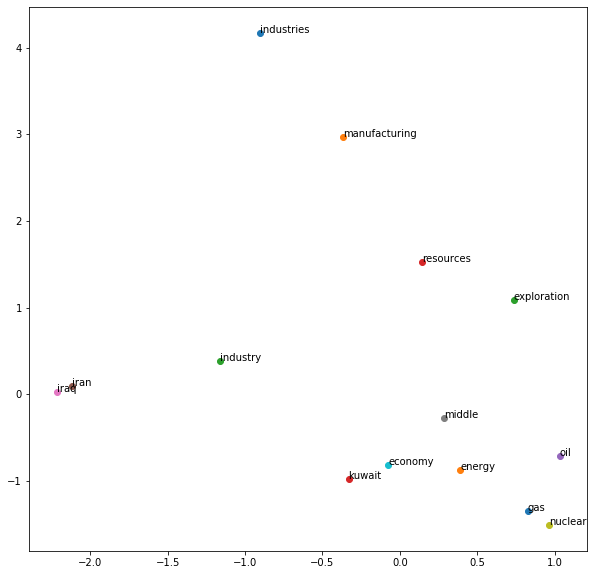

In [ ]:
# Ploting the embeddings
plt.figure(figsize=(10, 10))
temp_words = ['gas', 'energy', 'industry', 'kuwait', 'oil', 'iran', 'petroleum',
              'iraq', 'middle', 'nuclear', 'economy', 'industries',
              'manufacturing', 'employees', 'emirates', 'exploitation',
              'exploration', 'resources']
for word in temp_words:
    coord = embedding_dict.get(word)
    if coord is None:
      continue
    plt.scatter(coord[0], coord[1])
    plt.annotate(word, (coord[0], coord[1]))  

# Q3. MNIST

In [4]:
import tensorflow.keras
import numpy as np
from sklearn.utils import shuffle


(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.mnist.load_data()
x_train, y_train = shuffle(x_train, y_train, random_state=0)
x_test, y_test = shuffle(x_test, y_test, random_state=0)

In [5]:
print("Shape of x in train data: {}".format(x_train.shape))
print("Shape of x in test data: {}".format(x_test.shape))
print("Shape of y in train data: {}".format(y_train.shape))
print("Shape of y in test data: {}".format(y_test.shape))

Shape of x in train data: (60000, 28, 28)
Shape of x in test data: (10000, 28, 28)
Shape of y in train data: (60000,)
Shape of y in test data: (10000,)


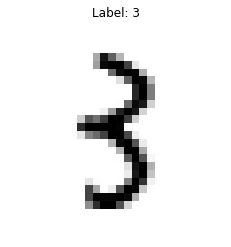

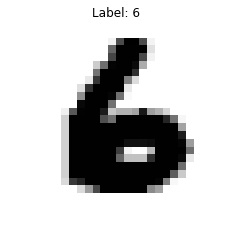

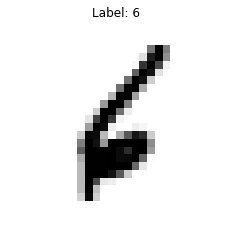

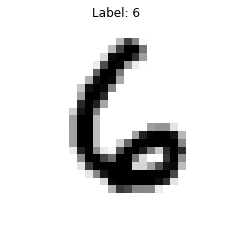

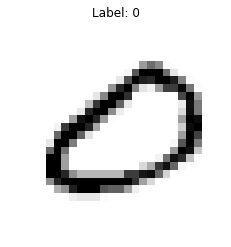

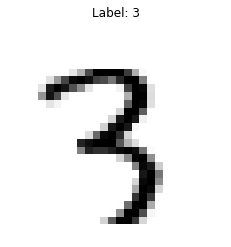

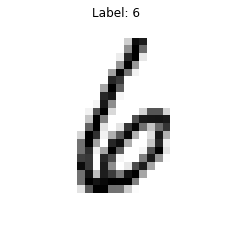

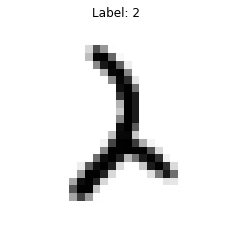

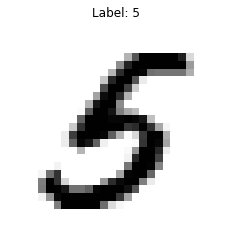

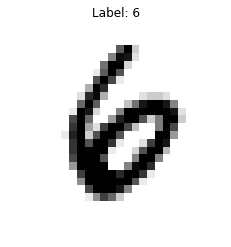

In [6]:
import matplotlib.pyplot as plt

for i in range(10):
    img = x_train[i]
    label = y_train[i]
    plt.imshow(img, cmap="binary")
    plt.title(f"Label: {label}")
    plt.axis("off")
    plt.show()

In [7]:
x_train = np.reshape(x_train, (*x_train.shape, 1))
x_test = np.reshape(x_test, (*x_test.shape, 1))

In [8]:
print("Shape of x in train data: {}".format(x_train.shape))
print("Shape of x in test data: {}".format(x_test.shape))
print("Shape of y in train data: {}".format(y_train.shape))
print("Shape of y in test data: {}".format(y_test.shape))

Shape of x in train data: (60000, 28, 28, 1)
Shape of x in test data: (10000, 28, 28, 1)
Shape of y in train data: (60000,)
Shape of y in test data: (10000,)


In [9]:
from tensorflow.keras.utils import to_categorical


x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
from tensorflow.keras.layers import ReLU, Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential


def create_network():
    network = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=x_train.shape[1:], 
               padding="same"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3,3), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3,3), activation='relu', padding="same"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    network.compile(
    optimizer = tensorflow.keras.optimizers.Adam(
    learning_rate=0.001, name='Adam'),
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
    )
    return network

In [16]:
import keras


model = create_network()
history = model.fit(x_train, y_train, epochs=15, batch_size=64,
                     validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - ETA: 0s - loss: 0.1714 - accuracy: 0.9467

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 [==============================] - 99s 2ms/sample - loss: 0.1714 - accuracy: 0.9467 - val_loss: 0.0502 - val_accuracy: 0.9837
Epoch 2/15
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0313 - val_accuracy: 0.9889
Epoch 3/15
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.0318 - accuracy: 0.9900 - val_loss: 0.0292 - val_accuracy: 0.9901
Epoch 4/15
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.0253 - accuracy: 0.9918 - val_loss: 0.0227 - val_accuracy: 0.9930
Epoch 5/15
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.0207 - accuracy: 0.9933 - val_loss: 0.0261 - val_accuracy: 0.9918
Epoch 6/15
60000/60000 [==============================] - 89s 1ms/sample - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0216 - val_accuracy: 0.9929
Epoch 7/15
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.0139 - accuracy: 0.9954 - val_loss

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [14]:
indices_to_visualize = [0, 12, 38, 83, 112, 74, 190, 250, 403, 500]
preds = []

for temp in indices_to_visualize:
  in_img = x_train[temp]
  x = image.img_to_array(in_img)
  x = np.expand_dims(x, axis=0)
  predict = model.predict(x)
  preds.append(np.argmax(predict[0]))

print(preds)

[3, 0, 7, 4, 9, 4, 5, 8, 5, 0]


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


# Grad-CAM

Tensor("dense_1/Softmax:0", shape=(None, 10), dtype=float32)
(None, 10)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


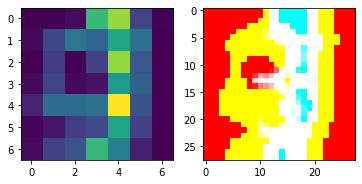

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


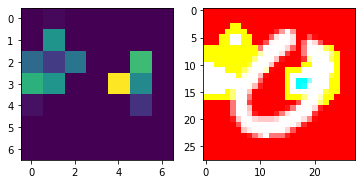

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


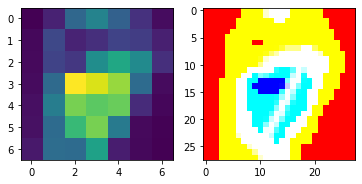

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


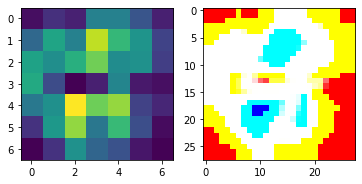

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


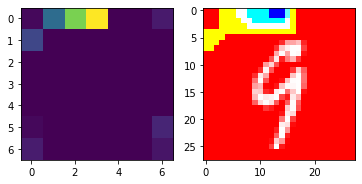

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


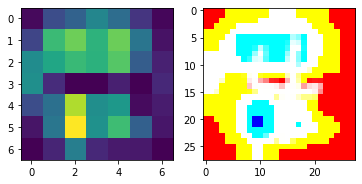

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


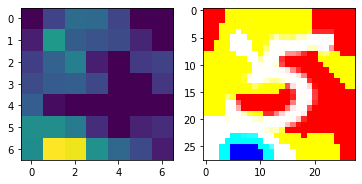

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


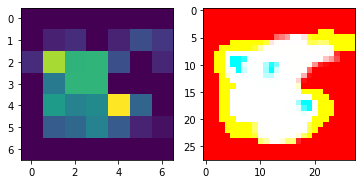

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


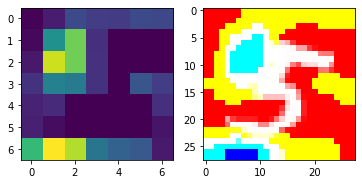

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


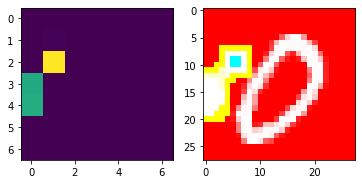

In [15]:
import cv2
import sys
import tensorflow
import matplotlib.pyplot as plt
import tensorflow.keras.backend as K
from keras.preprocessing import image

import sys
sys.setrecursionlimit(1000)

tensorflow.compat.v1.disable_eager_execution()
indices_to_visualize = [0, 12, 38, 83, 112, 74, 190, 250, 403, 500]

count = 0

for temp in indices_to_visualize:
  in_img = x_train[temp]
  x = image.img_to_array(in_img)
  x = np.expand_dims(x, axis=0)
  cont = preds[count]
  count += 1
  layer_out = model.output[:, cont]
  last_conv_layer = model.get_layer('conv2d_2')
  grads = K.gradients(layer_out, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1 , 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(64):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)
  fig, axes = plt.subplots(1, 2)
  axes[0].imshow(heatmap)
  img = x_train[temp]
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = heatmap * 0.4 + img
  axes[1].imshow(superimposed_img)
  plt.show()